In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 98% 64.0M/65.2M [00:04<00:00, 19.0MB/s]
100% 65.2M/65.2M [00:04<00:00, 13.8MB/s]


In [ ]:
import zipfile
import os

with zipfile.ZipFile('emotion-detection-fer.zip', 'r') as zip_ref:
    zip_ref.extractall('emotion_detection_data')

# List the extracted files
os.listdir('emotion_detection_data')


['train', 'test']

In [ ]:
train_dir = "/content/emotion_detection_data/train"
test_dir = "/content/emotion_detection_data/test"

In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
img_size=48

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
epochs = 45
batch_size = 64

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 95ms/step - accuracy: 0.2043 - loss: 2.2573 - val_accuracy: 0.2472 - val_loss: 2.8332
Epoch 2/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.3062 - loss: 1.8059 - val_accuracy: 0.3799 - val_loss: 1.5883
Epoch 3/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.3907 - loss: 1.5658 - val_accuracy: 0.4546 - val_loss: 1.4133
Epoch 4/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.4638 - loss: 1.3856 - val_accuracy: 0.4749 - val_loss: 1.3314
Epoch 5/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.5069 - loss: 1.2961 - val_accuracy: 0.5133 - val_loss: 1.2570
Epoch 6/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.5286 - loss: 1.2375 - val_accuracy: 0.5070 - val_loss: 1.2594
Epoch 7/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.5510 - loss: 1.1866 - val_accuracy: 0.5147 - val_loss: 1.3507
Epoch 8/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.5636 - loss: 1.1511 - val_accurac

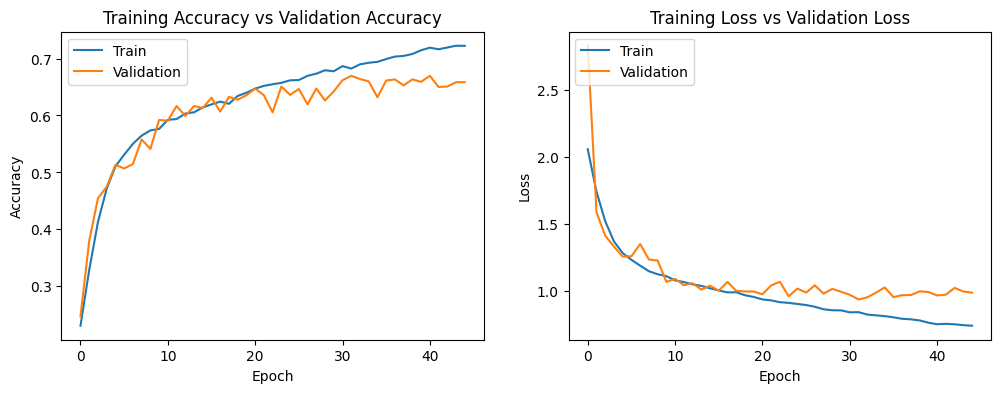

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save_weights('model_weights_fer.weights.h5')

In [ ]:
model.save('model_emosi.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_height = 48
img_width = 48

# Preprocess the input image
def preprocess_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    return img_array

def predict_emotion_with_image(image_path):
    # Load and display the image
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(preprocessed_img)
    predicted_class = tf.argmax(predictions[0]).numpy()

    return predicted_class


def class_to_emotion(predicted_emotion):
    res_dict = {0: 'angry',
                1: 'disgusted',
                2: 'fearful',
                3: 'happy',
                4: 'neutral',
                5: 'sad',
                6: 'surprised'
               }

    return res_dict[predicted_emotion]

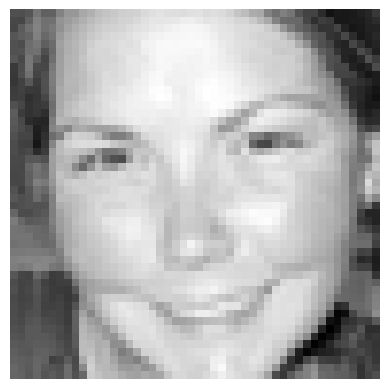

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted emotion class: happy


In [ ]:
image_path = "/content/emotion_detection_data/train/happy/im1.png"
predicted_emotion = predict_emotion_with_image(image_path)
print("Predicted emotion class:", class_to_emotion(predicted_emotion))